In [1]:
import pandas as pd 
from pandas import ExcelWriter
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)



Using TensorFlow backend.


In [7]:
data = pd.read_excel("owid-covid-data.xlsx") 
data.head

<bound method NDFrame.head of       iso_code       location        date  total_cases  new_cases  \
0          ABW          Aruba  2020-03-13            2          2   
1          ABW          Aruba  2020-03-20            4          2   
2          ABW          Aruba  2020-03-24           12          8   
3          ABW          Aruba  2020-03-25           17          5   
4          ABW          Aruba  2020-03-26           19          2   
...        ...            ...         ...          ...        ...   
16796      NaN  International  2020-02-28          705          0   
16797      NaN  International  2020-02-29          705          0   
16798      NaN  International  2020-03-01          705          0   
16799      NaN  International  2020-03-02          705          0   
16800      NaN  International  2020-03-10          696         -9   

       total_deaths  new_deaths  total_cases_per_million  \
0                 0           0                   18.733   
1                 0  

In [11]:
val=data.groupby(['location','date']).sum().reset_index()
val=val.loc[val['date'] == '2020-05-12']
val

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
123,Afghanistan,2020-05-12,4687,285,122,2,120.401,7.321,3.134,0.051,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500
188,Albania,2020-05-12,872,4,31,0,303.009,1.390,10.772,0.000,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890
317,Algeria,2020-05-12,5891,168,507,5,134.341,3.831,11.562,0.114,...,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900
377,Andorra,2020-05-12,756,1,48,0,9784.508,12.942,621.239,0.000,...,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000
429,Angola,2020-05-12,45,0,2,0,1.369,0.000,0.061,0.000,...,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,Western Sahara,2020-05-12,6,0,0,0,10.045,0.000,0.000,0.000,...,0.000,1.380,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
16659,World,2020-05-12,4137193,70644,285760,3393,530.763,9.063,36.660,0.435,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
16692,Yemen,2020-05-12,56,5,9,1,1.878,0.168,0.302,0.034,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
16747,Zambia,2020-05-12,267,0,7,0,14.524,0.000,0.381,0.000,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000


In [4]:
casestracker=val[['date','new_cases','total_deaths','gdp_per_capita','extreme_poverty',
                 'diabetes_prevalence','male_smokers','female_smokers','hospital_beds_per_100k']]
casestracker


,date,new_cases,total_deaths,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k
2767,2019-12-31,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
2768,2020-01-01,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
2769,2020-01-02,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
2770,2020-01-03,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
2771,2020-01-04,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
...,...,...,...,...,...,...,...,...,...
2896,2020-05-08,1426,4408,44017.591,0.5,7.37,16.6,12.0,2.5
2897,2020-05-09,1512,4569,44017.591,0.5,7.37,16.6,12.0,2.5
2898,2020-05-10,1268,4693,44017.591,0.5,7.37,16.6,12.0,2.5
2899,2020-05-11,1146,4871,44017.591,0.5,7.37,16.6,12.0,2.5


In [5]:
WeatherData = pd.read_csv('weather.csv') 


In [6]:
WeatherData=WeatherData.loc[WeatherData['country_region'].str.startswith('Canada')]

WeatherData=WeatherData.groupby(['date']).mean().reset_index()


In [7]:
WeatherData=WeatherData[['date','humidity','temp_max_mean_week','temp_min_mean_week','mean_week_humidity']]
WeatherData

,date,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity
0,2020-01-23,0.784,31.34325,17.516250,0.796250
1,2020-01-24,0.762,31.34325,17.516250,0.796250
2,2020-01-25,0.800,31.34325,17.516250,0.796250
3,2020-01-26,0.839,31.34325,17.516250,0.796250
4,2020-01-27,0.799,29.71900,15.924857,0.772143
...,...,...,...,...,...
84,2020-04-16,0.692,40.88100,23.670143,0.714714
85,2020-04-17,0.718,40.88100,23.670143,0.714714
86,2020-04-18,0.692,40.88100,23.670143,0.714714
87,2020-04-19,0.723,40.88100,23.670143,0.714714


In [8]:
DataMerged = pd.merge(WeatherData, casestracker, how='left', left_on='date', right_on='date')
DataMerged

,date,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,new_cases,total_deaths,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k
0,2020-01-23,0.784,31.34325,17.516250,0.796250,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
1,2020-01-24,0.762,31.34325,17.516250,0.796250,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
2,2020-01-25,0.800,31.34325,17.516250,0.796250,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
3,2020-01-26,0.839,31.34325,17.516250,0.796250,1,0,44017.591,0.5,7.37,16.6,12.0,2.5
4,2020-01-27,0.799,29.71900,15.924857,0.772143,0,0,44017.591,0.5,7.37,16.6,12.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-16,0.692,40.88100,23.670143,0.714714,1318,1010,44017.591,0.5,7.37,16.6,12.0,2.5
85,2020-04-17,0.718,40.88100,23.670143,0.714714,1717,1193,44017.591,0.5,7.37,16.6,12.0,2.5
86,2020-04-18,0.692,40.88100,23.670143,0.714714,1791,1309,44017.591,0.5,7.37,16.6,12.0,2.5
87,2020-04-19,0.723,40.88100,23.670143,0.714714,1469,1467,44017.591,0.5,7.37,16.6,12.0,2.5


In [9]:
DataMerged=DataMerged[['date','humidity','temp_max_mean_week','temp_min_mean_week','mean_week_humidity','new_cases','gdp_per_capita',
                       'extreme_poverty','diabetes_prevalence','male_smokers','female_smokers','hospital_beds_per_100k']]
DataMerged

,date,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,new_cases,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k
0,2020-01-23,0.784,31.34325,17.516250,0.796250,0,44017.591,0.5,7.37,16.6,12.0,2.5
1,2020-01-24,0.762,31.34325,17.516250,0.796250,0,44017.591,0.5,7.37,16.6,12.0,2.5
2,2020-01-25,0.800,31.34325,17.516250,0.796250,0,44017.591,0.5,7.37,16.6,12.0,2.5
3,2020-01-26,0.839,31.34325,17.516250,0.796250,1,44017.591,0.5,7.37,16.6,12.0,2.5
4,2020-01-27,0.799,29.71900,15.924857,0.772143,0,44017.591,0.5,7.37,16.6,12.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-16,0.692,40.88100,23.670143,0.714714,1318,44017.591,0.5,7.37,16.6,12.0,2.5
85,2020-04-17,0.718,40.88100,23.670143,0.714714,1717,44017.591,0.5,7.37,16.6,12.0,2.5
86,2020-04-18,0.692,40.88100,23.670143,0.714714,1791,44017.591,0.5,7.37,16.6,12.0,2.5
87,2020-04-19,0.723,40.88100,23.670143,0.714714,1469,44017.591,0.5,7.37,16.6,12.0,2.5


In [10]:
mask = (DataMerged['date'] > '2020-03-20') & (DataMerged['date'] <= '2020-05-12')
DataMerged=DataMerged.loc[mask]
i=60

DataMerged=DataMerged.reset_index()
DataMerged

,index,date,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,new_cases,gdp_per_capita,extreme_poverty,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_100k
0,58,2020-03-21,0.686,31.755571,11.618000,0.701857,125,44017.591,0.5,7.37,16.6,12.0,2.5
1,59,2020-03-22,0.691,31.755571,11.618000,0.701857,331,44017.591,0.5,7.37,16.6,12.0,2.5
2,60,2020-03-23,0.743,37.269714,20.291429,0.777143,128,44017.591,0.5,7.37,16.6,12.0,2.5
3,61,2020-03-24,0.815,37.269714,20.291429,0.777143,216,44017.591,0.5,7.37,16.6,12.0,2.5
4,62,2020-03-25,0.766,37.269714,20.291429,0.777143,313,44017.591,0.5,7.37,16.6,12.0,2.5
5,63,2020-03-26,0.772,37.269714,20.291429,0.777143,1426,44017.591,0.5,7.37,16.6,12.0,2.5
6,64,2020-03-27,0.803,37.269714,20.291429,0.777143,633,44017.591,0.5,7.37,16.6,12.0,2.5
7,65,2020-03-28,0.782,37.269714,20.291429,0.777143,657,44017.591,0.5,7.37,16.6,12.0,2.5
8,66,2020-03-29,0.759,37.269714,20.291429,0.777143,711,44017.591,0.5,7.37,16.6,12.0,2.5
9,67,2020-03-30,0.782,35.447143,21.833857,0.792143,869,44017.591,0.5,7.37,16.6,12.0,2.5


In [11]:
testsData = pd.read_csv('daily-covid-19-tests-per-thousand-rolling-3-day-average.csv')
testsData=testsData.loc[testsData['Entity'] == 'Canada']
testsData=testsData.reset_index()
testsData

,index,Entity,Code,Date,3-day rolling average of new tests per thousand
0,381,Canada,CAN,"Mar 21, 2020",0.308
1,382,Canada,CAN,"Mar 22, 2020",0.387
2,383,Canada,CAN,"Mar 23, 2020",0.268
3,384,Canada,CAN,"Mar 24, 2020",0.320
4,385,Canada,CAN,"Mar 25, 2020",0.383
5,386,Canada,CAN,"Mar 26, 2020",0.481
6,387,Canada,CAN,"Mar 27, 2020",0.403
7,388,Canada,CAN,"Mar 28, 2020",0.371
8,389,Canada,CAN,"Mar 29, 2020",0.431
9,390,Canada,CAN,"Mar 30, 2020",0.622


In [12]:
df_concat = pd.concat([DataMerged, testsData], axis=1)
final_data=df_concat.dropna()

In [13]:
final_data=final_data[['index','humidity','temp_max_mean_week','temp_min_mean_week','mean_week_humidity',
           '3-day rolling average of new tests per thousand','new_cases']]

In [14]:
from sklearn.model_selection import train_test_split
labels_Y=final_data['new_cases']
labels_Y

0      125.0
1      331.0
2      128.0
3      216.0
4      313.0
5     1426.0
6      633.0
7      657.0
8      711.0
9      869.0
10    1169.0
11    1112.0
12    1059.0
13    1673.0
14    1251.0
15    1363.0
16    1614.0
17    1157.0
18    1230.0
19    1391.0
20    1474.0
21    1385.0
22    1168.0
23    1064.0
24    1298.0
25    1383.0
26    1318.0
27    1717.0
28    1791.0
29    1469.0
30    1436.0
Name: new_cases, dtype: float64

In [15]:
Data_X=final_data.drop(['new_cases'],axis=1)
Data_X

,index,index,humidity,temp_max_mean_week,temp_min_mean_week,mean_week_humidity,3-day rolling average of new tests per thousand
0,58.0,381,0.686,31.755571,11.618000,0.701857,0.308
1,59.0,382,0.691,31.755571,11.618000,0.701857,0.387
2,60.0,383,0.743,37.269714,20.291429,0.777143,0.268
3,61.0,384,0.815,37.269714,20.291429,0.777143,0.320
4,62.0,385,0.766,37.269714,20.291429,0.777143,0.383
5,63.0,386,0.772,37.269714,20.291429,0.777143,0.481
6,64.0,387,0.803,37.269714,20.291429,0.777143,0.403
7,65.0,388,0.782,37.269714,20.291429,0.777143,0.371
8,66.0,389,0.759,37.269714,20.291429,0.777143,0.431
9,67.0,390,0.782,35.447143,21.833857,0.792143,0.622


In [16]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
Data_X, labels_Y, test_size=0.33, random_state=20)


In [18]:
X_train
y_test

28    1791.0
19    1391.0
4      313.0
1      331.0
24    1298.0
30    1436.0
10    1169.0
13    1673.0
18    1230.0
21    1385.0
12    1059.0
Name: new_cases, dtype: float64

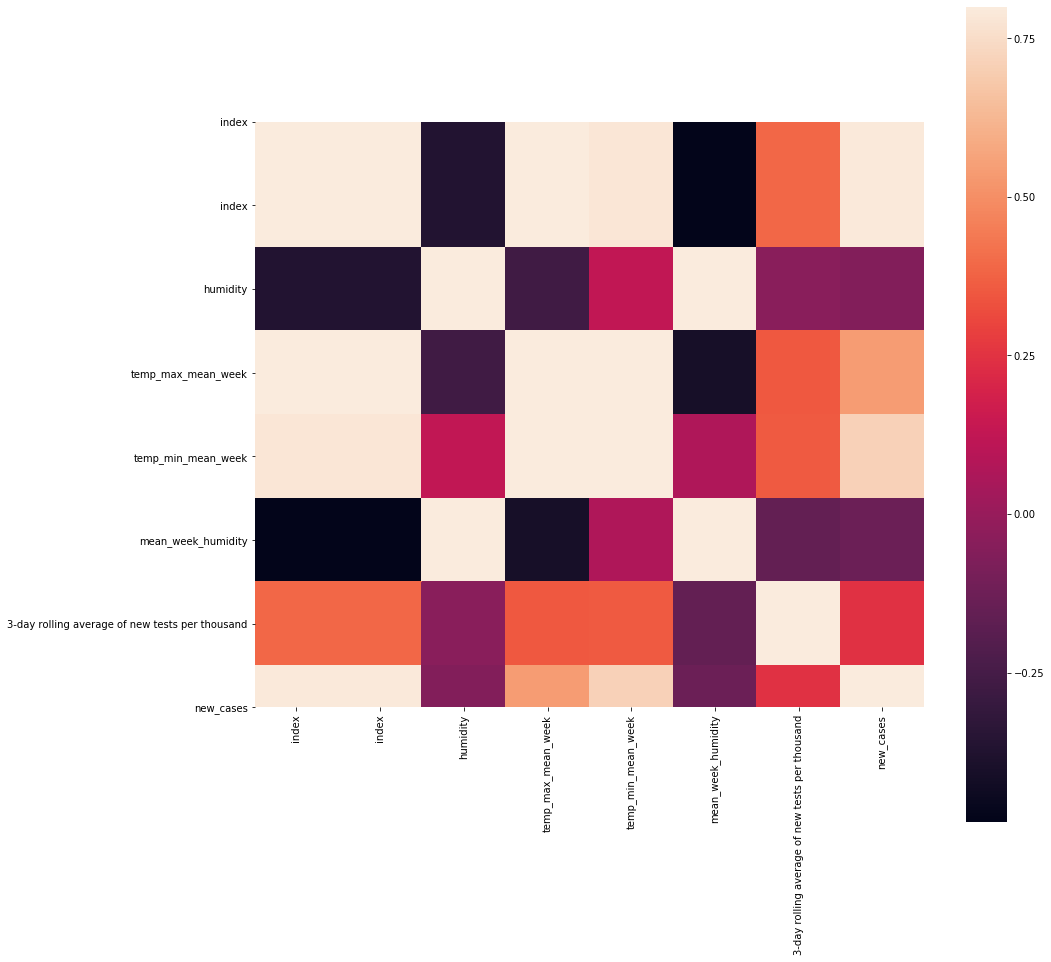

In [19]:
C_mat = final_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()


In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 6,241
Trainable params: 6,241
Non-trainable params: 0
_________________________________________________________________


In [37]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=4, validation_split = 0.2, callbacks=callbacks_list)


Train on 16 samples, validate on 4 samples
Epoch 1/500
16/16 [==============================] - 0s 4ms/step - loss: 333.7525 - mean_absolute_error: 333.7525 - val_loss: 348.4126 - val_mean_absolute_error: 348.4126

Epoch 00001: val_loss did not improve from 306.74680
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 333.9747 - mean_absolute_error: 333.9747 - val_loss: 346.7473 - val_mean_absolute_error: 346.7473

Epoch 00002: val_loss did not improve from 306.74680
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 334.9488 - mean_absolute_error: 334.9488 - val_loss: 358.0622 - val_mean_absolute_error: 358.0622

Epoch 00003: val_loss did not improve from 306.74680
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 334.8988 - mean_absolute_error: 334.8988 - val_loss: 345.0679 - val_mean_absolute_error: 345.0679

Epoch 00004: val_loss did not improve from 306.74680
Epoch 5/500
16/16 [==============================] - 0s 5

16/16 [==============================] - 0s 5ms/step - loss: 327.9479 - mean_absolute_error: 327.9479 - val_loss: 339.1655 - val_mean_absolute_error: 339.1655

Epoch 00073: val_loss did not improve from 306.74680
Epoch 74/500
16/16 [==============================] - 0s 5ms/step - loss: 332.2401 - mean_absolute_error: 332.2401 - val_loss: 355.9549 - val_mean_absolute_error: 355.9549

Epoch 00074: val_loss did not improve from 306.74680
Epoch 75/500
16/16 [==============================] - 0s 4ms/step - loss: 337.6668 - mean_absolute_error: 337.6668 - val_loss: 350.7879 - val_mean_absolute_error: 350.7879

Epoch 00075: val_loss did not improve from 306.74680
Epoch 76/500
16/16 [==============================] - 0s 3ms/step - loss: 330.7603 - mean_absolute_error: 330.7603 - val_loss: 326.5942 - val_mean_absolute_error: 326.5942

Epoch 00076: val_loss did not improve from 306.74680
Epoch 77/500
16/16 [==============================] - 0s 3ms/step - loss: 333.9258 - mean_absolute_error: 333

16/16 [==============================] - 0s 5ms/step - loss: 324.5537 - mean_absolute_error: 324.5537 - val_loss: 338.4861 - val_mean_absolute_error: 338.4861

Epoch 00145: val_loss did not improve from 306.74680
Epoch 146/500
16/16 [==============================] - 0s 4ms/step - loss: 329.3020 - mean_absolute_error: 329.3020 - val_loss: 357.7376 - val_mean_absolute_error: 357.7376

Epoch 00146: val_loss did not improve from 306.74680
Epoch 147/500
16/16 [==============================] - 0s 5ms/step - loss: 326.5797 - mean_absolute_error: 326.5797 - val_loss: 331.1577 - val_mean_absolute_error: 331.1577

Epoch 00147: val_loss did not improve from 306.74680
Epoch 148/500
16/16 [==============================] - 0s 5ms/step - loss: 328.5203 - mean_absolute_error: 328.5203 - val_loss: 333.8130 - val_mean_absolute_error: 333.8130

Epoch 00148: val_loss did not improve from 306.74680
Epoch 149/500
16/16 [==============================] - 0s 5ms/step - loss: 325.7746 - mean_absolute_error:

16/16 [==============================] - 0s 3ms/step - loss: 332.5221 - mean_absolute_error: 332.5221 - val_loss: 359.9541 - val_mean_absolute_error: 359.9541

Epoch 00181: val_loss did not improve from 300.40991
Epoch 182/500
16/16 [==============================] - 0s 4ms/step - loss: 327.2995 - mean_absolute_error: 327.2995 - val_loss: 332.2794 - val_mean_absolute_error: 332.2794

Epoch 00182: val_loss did not improve from 300.40991
Epoch 183/500
16/16 [==============================] - 0s 3ms/step - loss: 324.7905 - mean_absolute_error: 324.7905 - val_loss: 333.8550 - val_mean_absolute_error: 333.8550

Epoch 00183: val_loss did not improve from 300.40991
Epoch 184/500
16/16 [==============================] - 0s 6ms/step - loss: 335.2893 - mean_absolute_error: 335.2893 - val_loss: 316.7953 - val_mean_absolute_error: 316.7953

Epoch 00184: val_loss did not improve from 300.40991
Epoch 185/500
16/16 [==============================] - 0s 3ms/step - loss: 320.0044 - mean_absolute_error:

16/16 [==============================] - 0s 3ms/step - loss: 319.0856 - mean_absolute_error: 319.0856 - val_loss: 337.1377 - val_mean_absolute_error: 337.1377

Epoch 00253: val_loss did not improve from 298.61560
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 315.6697 - mean_absolute_error: 315.6697 - val_loss: 329.9697 - val_mean_absolute_error: 329.9697

Epoch 00254: val_loss did not improve from 298.61560
Epoch 255/500
16/16 [==============================] - 0s 2ms/step - loss: 317.2082 - mean_absolute_error: 317.2082 - val_loss: 325.7257 - val_mean_absolute_error: 325.7257

Epoch 00255: val_loss did not improve from 298.61560
Epoch 256/500
16/16 [==============================] - 0s 3ms/step - loss: 313.5796 - mean_absolute_error: 313.5796 - val_loss: 321.7456 - val_mean_absolute_error: 321.7456

Epoch 00256: val_loss did not improve from 298.61560
Epoch 257/500
16/16 [==============================] - 0s 2ms/step - loss: 314.0063 - mean_absolute_error:

16/16 [==============================] - 0s 2ms/step - loss: 314.8400 - mean_absolute_error: 314.8400 - val_loss: 277.8883 - val_mean_absolute_error: 277.8883

Epoch 00289: val_loss improved from 286.45718 to 277.88834, saving model to Weights-289--277.88834.hdf5
Epoch 290/500
16/16 [==============================] - 0s 2ms/step - loss: 321.4439 - mean_absolute_error: 321.4439 - val_loss: 277.9727 - val_mean_absolute_error: 277.9727

Epoch 00290: val_loss did not improve from 277.88834
Epoch 291/500
16/16 [==============================] - 0s 2ms/step - loss: 310.4506 - mean_absolute_error: 310.4506 - val_loss: 296.2951 - val_mean_absolute_error: 296.2951

Epoch 00291: val_loss did not improve from 277.88834
Epoch 292/500
16/16 [==============================] - 0s 2ms/step - loss: 300.4766 - mean_absolute_error: 300.4766 - val_loss: 326.5930 - val_mean_absolute_error: 326.5930

Epoch 00292: val_loss did not improve from 277.88834
Epoch 293/500
16/16 [==============================] - 


Epoch 00324: val_loss did not improve from 273.19588
Epoch 325/500
16/16 [==============================] - 0s 3ms/step - loss: 305.2906 - mean_absolute_error: 305.2906 - val_loss: 310.8792 - val_mean_absolute_error: 310.8792

Epoch 00325: val_loss did not improve from 273.19588
Epoch 326/500
16/16 [==============================] - 0s 3ms/step - loss: 306.2617 - mean_absolute_error: 306.2617 - val_loss: 298.1697 - val_mean_absolute_error: 298.1697

Epoch 00326: val_loss did not improve from 273.19588
Epoch 327/500
16/16 [==============================] - 0s 3ms/step - loss: 304.1546 - mean_absolute_error: 304.1546 - val_loss: 324.4998 - val_mean_absolute_error: 324.4998

Epoch 00327: val_loss did not improve from 273.19588
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 302.7882 - mean_absolute_error: 302.7882 - val_loss: 319.1533 - val_mean_absolute_error: 319.1533

Epoch 00328: val_loss did not improve from 273.19588
Epoch 329/500
16/16 [=================

16/16 [==============================] - 0s 3ms/step - loss: 282.5857 - mean_absolute_error: 282.5857 - val_loss: 252.2578 - val_mean_absolute_error: 252.2578

Epoch 00395: val_loss improved from 255.93291 to 252.25778, saving model to Weights-395--252.25778.hdf5
Epoch 396/500
16/16 [==============================] - 0s 2ms/step - loss: 276.2514 - mean_absolute_error: 276.2514 - val_loss: 267.0897 - val_mean_absolute_error: 267.0897

Epoch 00396: val_loss did not improve from 252.25778
Epoch 397/500
16/16 [==============================] - 0s 2ms/step - loss: 290.3455 - mean_absolute_error: 290.3455 - val_loss: 302.3231 - val_mean_absolute_error: 302.3231

Epoch 00397: val_loss did not improve from 252.25778
Epoch 398/500
16/16 [==============================] - 0s 2ms/step - loss: 276.8822 - mean_absolute_error: 276.8822 - val_loss: 274.5021 - val_mean_absolute_error: 274.5021

Epoch 00398: val_loss did not improve from 252.25778
Epoch 399/500
16/16 [==============================] - 

16/16 [==============================] - 0s 3ms/step - loss: 216.9761 - mean_absolute_error: 216.9761 - val_loss: 214.8712 - val_mean_absolute_error: 214.8712

Epoch 00458: val_loss did not improve from 204.70703
Epoch 459/500
16/16 [==============================] - 0s 3ms/step - loss: 220.1662 - mean_absolute_error: 220.1662 - val_loss: 229.7663 - val_mean_absolute_error: 229.7663

Epoch 00459: val_loss did not improve from 204.70703
Epoch 460/500
16/16 [==============================] - 0s 3ms/step - loss: 254.2784 - mean_absolute_error: 254.2784 - val_loss: 274.4990 - val_mean_absolute_error: 274.4990

Epoch 00460: val_loss did not improve from 204.70703
Epoch 461/500
16/16 [==============================] - 0s 3ms/step - loss: 228.3002 - mean_absolute_error: 228.3002 - val_loss: 227.4406 - val_mean_absolute_error: 227.4406

Epoch 00461: val_loss did not improve from 204.70703
Epoch 462/500
16/16 [==============================] - 0s 3ms/step - loss: 267.7116 - mean_absolute_error:

In [38]:
predictions = NN_model.predict(X_test)


In [39]:
predictions

array([[1500.1681 ],
       [1210.5731 ],
       [ 528.2862 ],
       [ 116.51958],
       [1372.8676 ],
       [1675.1681 ],
       [ 822.68536],
       [ 939.9694 ],
       [1183.0856 ],
       [1269.3861 ],
       [ 900.75604]], dtype=float32)

In [40]:
y_test

28    1791.0
19    1391.0
4      313.0
1      331.0
24    1298.0
30    1436.0
10    1169.0
13    1673.0
18    1230.0
21    1385.0
12    1059.0
Name: new_cases, dtype: float64